In [13]:
from matplotlib import pyplot as plt
#%matplotlib inline
import seaborn as sns

# Reading the data

In [14]:
import pandas as pd
dfb=pd.read_csv('Bronze.csv',sep=",",header=None)
print(dfb.head(3))
dfg=pd.read_csv('Gold.csv',header=None)
print(dfg.head(3))
dfp=pd.read_csv('Platinum.csv',header=None)
print(dfp.head(3))
dfs=pd.read_csv('Silver.csv',header=None)
print(dfs.head(3))
# dfa=pd.read_csv('Intel_ARK_ComparisonChart_2017_11_01.csv' ,header=None)
# print(dfa.head(3))

             0              1   \
0  CINT2006rate  Cisco Systems   
1  CINT2006rate  Cisco Systems   
2  CINT2006rate      Dell Inc.   

                                                  2   3   4   5     6   7   \
0  Cisco UCS C240 M5 (Intel Xeon Bronze 3104, 1.7...  12   2   6  1700  12   
1  Cisco UCS C240 M5 (Intel Xeon Bronze 3106, 1.7...  16   2   8  1700  16   
2  PowerEdge C6420 (Intel Xeon Bronze 3104, 1.70 ...  12   2   6  1700  12   

    8    9         10  
0  344  330  Oct-2017  
1  458  439  Oct-2017  
2  286  275  Aug-2017  
             0                  1                                     2   3   \
0  CINT2006rate  Acer Incorporated  Altos R360 F4 (Intel Xeon Gold 6126)  24   
1  CINT2006rate  Acer Incorporated  Altos R360 F4 (Intel Xeon Gold 6130)  32   
2  CINT2006rate  Acer Incorporated  Altos R360 F4 (Intel Xeon Gold 6134)  16   

   4   5     6   7     8     9         10  
0   2  12  2600  48  1360  1290  Oct-2017  
1   2  16  2100  64  1540  1450  Oct-2017  
2

# Cleaning the data

In [15]:
# dfb=dfb.drop(dfb.columns[[0]], axis=1)  
# print(dfb.head(3))
# dfs=dfs.drop(dfs.columns[[0]], axis=1)  
# print(dfs.head(3))
# dfg=dfg.drop(dfg.columns[[0]], axis=1)  
# print(dfg.head(3))
# dfp=dfp.drop(dfp.columns[[0]], axis=1)  
# print(dfp.head(3))

In [16]:
dfb.columns = ['benchmark', 'hardware_vendor','system','#_cores','#_chips','#_cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfs.columns = ['benchmark', 'hardware_vendor','system','#_cores','#_chips','#_cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfg.columns = ['benchmark', 'hardware_vendor','system','#_cores','#_chips','#_cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfp.columns = ['benchmark', 'hardware_vendor','system','#_cores','#_chips','#_cores_per_chip','processor_mhz','base_copies','result','baseline','published']
print(dfp.head(3))
dfb.to_csv('br.csv', sep='\t', encoding='utf-8')
dfs.to_csv('sl.csv', sep='\t', encoding='utf-8')
dfg.to_csv('go.csv', sep='\t', encoding='utf-8')
dfp.to_csv('pl.csv', sep='\t', encoding='utf-8')


      benchmark hardware_vendor  \
0  CINT2006rate   Cisco Systems   
1  CINT2006rate   Cisco Systems   
2  CINT2006rate   Cisco Systems   

                                              system  #_cores  #_chips  \
0  Cisco UCS B200 M5 (Intel Xeon Platinum 8153, 2...       32        2   
1  Cisco UCS B200 M5 (Intel Xeon Platinum 8156, 3...        8        2   
2  Cisco UCS B200 M5 (Intel Xeon Platinum 8160, 2...       48        2   

   #_cores_per_chip  processor_mhz  base_copies  result  baseline published  
0                16           2000           64    1420      1340  Sep-2017  
1                 4           3600           16     610       574  Oct-2017  
2                24           2100           96    2260      2160  Sep-2017  


# BRONZE

In [48]:
print("\n\n\n\n\t\t\t*******************BRONZE****************\n\n\n\n")

# df1=pd.DataFrame()
# df1['hardware_vendor_name']=(pd.Series(dfb.hardware_vendor.unique())).values
# df1['hardware_vendor_count']=(pd.Series(dfb.hardware_vendor.value_counts())).values
# df2=pd.DataFrame()
# df2['system']=(pd.Series(dfb.system.unique())).values
# df2['system_count']=(pd.Series(dfb.system.value_counts())).values
# print(df1,'\n','\n','\n',df2)
# from datetime import date

# d0 = date(2008, 8, 18)
# d1 = date(2008, 9, 26)
# delta = d1 - d0
# print (delta.days)
print('hardware vendors with their counts','\n')
print(dfb['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfb['system'].value_counts())
b=dfb['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfb.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])
series=''
a=[]
b=[]
c=[]
s=[]
a=dfb['system'].values
m=dfb['published'].values
n=""
days=[]
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,dfb['system'].count()):
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    n=dfb.published[i].split('-')
    d0 = date(2000, 1, 1)
    d1 = date(int(n[1]),month.index(n[0]),1)
    days.append((d1-d0).days)
    if('Intel' in b):
        series=' '.join(b[(b.index('Intel')):(b.index('Intel')+4)])        
        dfb.system[i]=series
        c.append(series)
        s.append(series)
df=pd.DataFrame()
df['system']=(pd.Series(dfb.system.unique())).values
print('\n','Different series of processeor ','\n')
print(df['system'])
dfb['days']=(pd.Series(days)).values
dfb.to_csv('mlb.csv', sep='\t', encoding='utf-8')










			*******************BRONZE****************




hardware vendors with their counts 

Dell Inc.                   17
Lenovo Global Technology    13
Huawei                       6
Cisco Systems                2
Fujitsu                      2
Name: hardware_vendor, dtype: int64

 systems with their counts 

Intel Xeon Bronze 3106    22
Intel Xeon Bronze 3104    18
Name: system, dtype: int64

 Vendors Using Intel Xeon 

0               Cisco Systems
1                   Dell Inc.
2                     Fujitsu
3                      Huawei
4    Lenovo Global Technology
Name: hardware_vendor, dtype: object


C:\Users\TCS\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 Different series of processeor  

0    Intel Xeon Bronze 3104
1    Intel Xeon Bronze 3106
Name: system, dtype: object


# SILVER

In [49]:
print("\n\n\n\n\t\t\t*******************SILVER****************\n\n\n\n")
print('hardware vendors with their counts','\n')
print(dfs['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfs['system'].value_counts())
b=dfs['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfs.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])
series=''
a=[]
b=[]
c=[]
s=[]
a=dfs['system'].values
m=dfs['published'].values
n=""
days=[]
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,dfs['system'].count()):
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    n=dfs.published[i].split('-')
    d0 = date(2000, 1, 1)
    d1 = date(int(n[1]),month.index(n[0]),1)
    days.append((d1-d0).days)
    if('Intel' in b):
        series=' '.join(b[(b.index('Intel')):(b.index('Intel')+4)])        
        dfs.system[i]=series
        c.append(series)
        s.append(series)
df=pd.DataFrame()
df['system']=(pd.Series(dfs.system.unique())).values
print('\n','Different series of processeor ','\n')
print(df['system'])
dfs['days']=(pd.Series(days)).values
dfs.to_csv('mls.csv', sep='\t', encoding='utf-8')








			*******************SILVER****************




hardware vendors with their counts 

Lenovo Global Technology    42
Dell Inc.                   36
Huawei                      18
Cisco Systems                6
Fujitsu                      5
M Computers s.r.o.           2
Name: hardware_vendor, dtype: int64

 systems with their counts 

Intel Xeon Silver 4116     22
Intel Xeon Silver 4114     19
Intel Xeon Silver 4112     19
Intel Xeon Silver 4108     18
Intel Xeon Silver 4110     17
Intel Xeon Silver 4109T    12
Intel Xeon Silver 4114T     1
Intel Xeon Silver 4116T     1
Name: system, dtype: int64

 

C:\Users\TCS\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Vendors Using Intel Xeon 

0               Cisco Systems
1                   Dell Inc.
2                     Fujitsu
3                      Huawei
4    Lenovo Global Technology
5          M Computers s.r.o.
Name: hardware_vendor, dtype: object

 Different series of processeor  

0     Intel Xeon Silver 4112
1     Intel Xeon Silver 4108
2     Intel Xeon Silver 4110
3     Intel Xeon Silver 4114
4     Intel Xeon Silver 4116
5    Intel Xeon Silver 4109T
6    Intel Xeon Silver 4114T
7    Intel Xeon Silver 4116T
Name: system, dtype: object


# GOLD

In [51]:


print("\n\n\n\n\t\t\t*******************GOLD****************\n\n\n\n")

print('hardware vendors with their counts','\n')
print(dfg['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfg['system'].value_counts())
b=dfg['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfg.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])
series=''
a=[]
b=[]
c=[]
s=[]
a=dfg['system'].values
m=dfg['published'].values
n=""
days=[]
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,dfg['system'].count()):
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    n=dfg.published[i].split('-')
    d0 = date(2000, 1, 1)
    d1 = date(int(n[1]),month.index(n[0]),1)
    days.append((d1-d0).days)
    if('Intel' in b):
        series=' '.join(b[(b.index('Intel')):(b.index('Intel')+4)])        
        dfg.system[i]=series
        c.append(series)
        s.append(series)
df=pd.DataFrame()
df['system']=(pd.Series(dfg.system.unique())).values
print('\n','Different series of processeor ','\n')
print(df['system'])
dfg['days']=(pd.Series(days)).values
dfg.to_csv('mlg.csv', sep='\t', encoding='utf-8')









			*******************GOLD****************




hardware vendors with their counts 

Lenovo Global Technology    134
Dell Inc.                   119
Huawei                       77
Cisco Systems                72
Acer Incorporated            25
Fujitsu                      19
Supermicro                    3
H3C                           2
Name: hardware_vendor, dtype: int64

 systems with their counts 

Intel Xeon Gold 6126      29
Intel Xeon Gold 6138      29
Intel Xeon Gold 5122      28
Intel Xeon Gold 5118      28
Intel Xeon Gold 5120      28
Intel Xeon Gold 6130      26
Intel Xeon Gold 5115      25
Intel Xeon Gold 6136      23
Intel Xeon Gold 6148      23
Intel Xeon Gold 6152      22
Intel Xeon Gold 6140      22
Intel Xeon Gold 6150      22
Intel Xeon Gold 6142      21
Intel Xeon Gold 6134      19
Intel Xeon Gold 6154      14
Intel Xeon Gold 6132      13
Intel Xeon Gold 6128      12
Intel Xeon Gold 6130T     12
Intel Xeon Gold 6144      10
Intel Xeon Gold 5120T      9
Intel Xeon

C:\Users\TCS\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 Different series of processeor  

0       Intel Xeon Gold 6126
1       Intel Xeon Gold 6130
2       Intel Xeon Gold 6134
3       Intel Xeon Gold 6136
4       Intel Xeon Gold 6138
5       Intel Xeon Gold 6140
6       Intel Xeon Gold 6148
7       Intel Xeon Gold 6150
8       Intel Xeon Gold 6152
9       Intel Xeon Gold 5118
10      Intel Xeon Gold 5120
11      Intel Xeon Gold 6144
12      Intel Xeon Gold 6146
13      Intel Xeon Gold 6154
14      Intel Xeon Gold 5115
15      Intel Xeon Gold 5122
16      Intel Xeon Gold 6128
17      Intel Xeon Gold 6132
18      Intel Xeon Gold 6142
19     Intel Xeon Gold 6134M
20     Intel Xeon Gold 6140M
21     Intel Xeon Gold 6142M
22     Intel Xeon Gold 6126F
23     Intel Xeon Gold 6138F
24     Intel Xeon Gold 6148F
25     Intel Xeon Gold 5119T
26     Intel Xeon Gold 5120T
27     Intel Xeon Gold 6126T
28     Intel Xeon Gold 6130T
29     Intel Xeon Gold 6138T
30    H3C UniServer R4900 G3
Name: system, dtype: object


# PLATINUM

In [52]:
print("\n\n\n\n\t\t\t*******************PLATINUM****************\n\n\n\n")

print('hardware vendors with their counts','\n')
print(dfp['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfp['system'].value_counts())
b=dfp['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfp.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])
series=''
a=[]
b=[]
c=[]
s=[]
a=dfp['system'].values
m=dfp['published'].values
n=""
days=[]
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,dfp['system'].count()):
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    n=dfp.published[i].split('-')
    d0 = date(2000, 1, 1)
    d1 = date(int(n[1]),month.index(n[0]),1)
    days.append((d1-d0).days)
    if('Intel' in b):
        series=' '.join(b[(b.index('Intel')):(b.index('Intel')+4)])        
        dfp.system[i]=series
        c.append(series)
        s.append(series)
df=pd.DataFrame()
df['system']=(pd.Series(dfp.system.unique())).values
print('\n','Different series of processeor ','\n')
print(df['system'])
dfp['days']=(pd.Series(days)).values
dfp.to_csv('mlp.csv', sep='\t', encoding='utf-8')







			*******************PLATINUM****************




hardware vendors with their counts 

Lenovo Global Technology      70
Cisco Systems                 45
Dell Inc.                     38
Huawei                        30
Fujitsu                       11
H3C                            3
Hewlett Packard Enterprise     2
Supermicro                     2
Nokia                          1
Name: hardware_vendor, dtype: int64

 systems with their counts 

Intel Xeon Platinum 8180     25
Intel Xeon Platinum 8176     24
Intel Xeon Platinum 8164     23
Intel Xeon Platinum 8156     21
Intel Xeon Platinum 8153     21
Intel Xeon Platinum 8170     21
Intel Xeon Platinum 8160     19
Intel Xeon Platinum 8168     18
Intel Xeon Platinum 8158     11
Intel Xeon Platinum 8180M     5
Intel Xeon Platinum 8160T     4
Intel Xeon Platinum 8160M     4
Intel Xeon Platinum 8170M     2
Intel Xeon Platinum 8176M     2
AirFrame AR-D521U-A           1
Intel Xeon Platinum 8160F     1
Name: system, dtype: int64

 Vend

C:\Users\TCS\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 Different series of processeor  

0      Intel Xeon Platinum 8153
1      Intel Xeon Platinum 8156
2      Intel Xeon Platinum 8160
3      Intel Xeon Platinum 8164
4      Intel Xeon Platinum 8168
5      Intel Xeon Platinum 8170
6      Intel Xeon Platinum 8176
7      Intel Xeon Platinum 8180
8      Intel Xeon Platinum 8158
9     Intel Xeon Platinum 8160M
10    Intel Xeon Platinum 8170M
11    Intel Xeon Platinum 8176M
12    Intel Xeon Platinum 8180M
13    Intel Xeon Platinum 8160F
14    Intel Xeon Platinum 8160T
15          AirFrame AR-D521U-A
Name: system, dtype: object


### Most used series

In [25]:
from datetime import date

d0 = date(2008, 8, 18)
d1 = date(2008, 9, 26)
delta = d1 - d0
print (delta.days)

39


In [28]:
df=pd.DataFrame()
df['series']=(pd.Series(s)).values
print(df['series'].value_counts())

Intel Xeon Gold 6126         29
Intel Xeon Gold 6138         29
Intel Xeon Gold 5122         28
Intel Xeon Gold 5118         28
Intel Xeon Gold 5120         28
Intel Xeon Gold 6130         26
Intel Xeon Gold 5115         25
Intel Xeon Platinum 8180     25
Intel Xeon Platinum 8176     24
Intel Xeon Platinum 8164     23
Intel Xeon Gold 6136         23
Intel Xeon Gold 6148         23
Intel Xeon Gold 6140         22
Intel Xeon Gold 6150         22
Intel Xeon Gold 6152         22
Intel Xeon Silver 4116       22
Intel Xeon Bronze 3106       22
Intel Xeon Gold 6142         21
Intel Xeon Platinum 8156     21
Intel Xeon Platinum 8153     21
Intel Xeon Platinum 8170     21
Intel Xeon Silver 4112       19
Intel Xeon Platinum 8160     19
Intel Xeon Silver 4114       19
Intel Xeon Gold 6134         19
Intel Xeon Platinum 8168     18
Intel Xeon Bronze 3104       18
Intel Xeon Silver 4108       18
Intel Xeon Silver 4110       17
Intel Xeon Gold 6154         14
Intel Xeon Gold 6132         13
Intel Xe

# Plotting graphs

### BAR GRAPH ( Hardware Vendor count )

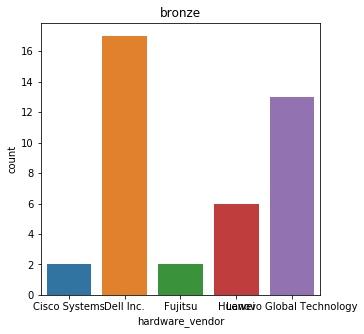

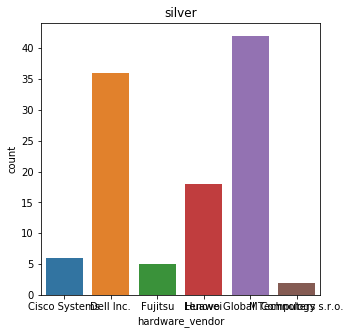

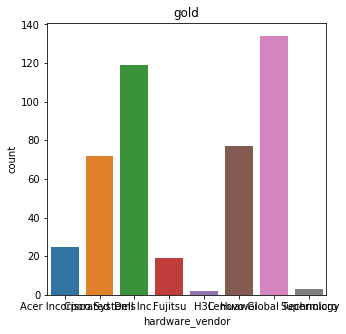

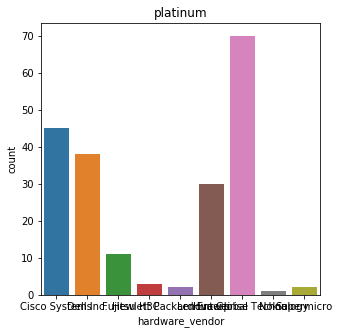

In [45]:
plt.subplots(figsize=(5,5))
sns.countplot(x='hardware_vendor',data=dfb)
plt.title('bronze')
plt.show()

plt.subplots(figsize=(5,5))
sns.countplot(x='hardware_vendor',data=dfs)
plt.title('silver')
plt.show()

plt.subplots(figsize=(5,5))
sns.countplot(x='hardware_vendor',data=dfg)
plt.title('gold')
plt.show()

plt.subplots(figsize=(5,5))
sns.countplot(x='hardware_vendor',data=dfp)
plt.title('platinum')
plt.show()

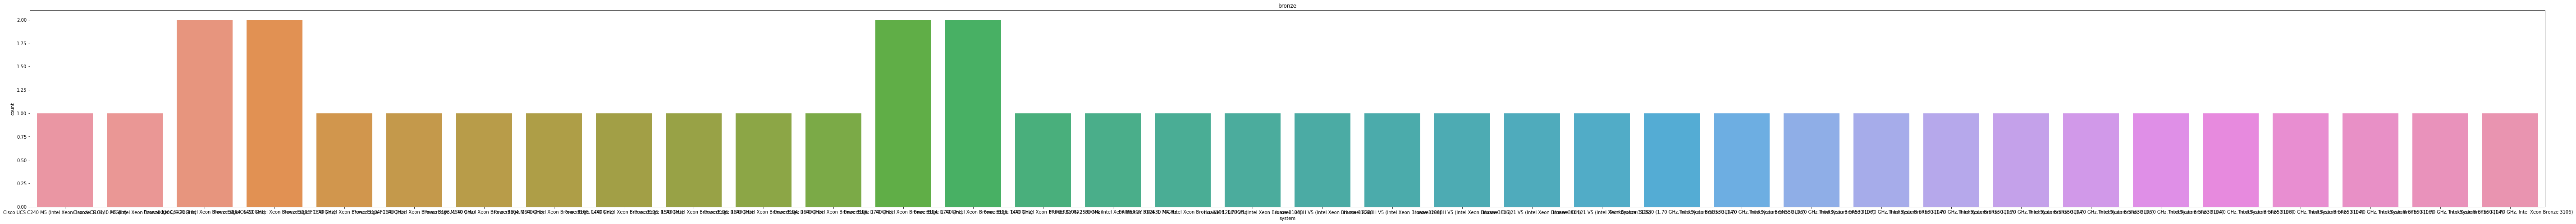

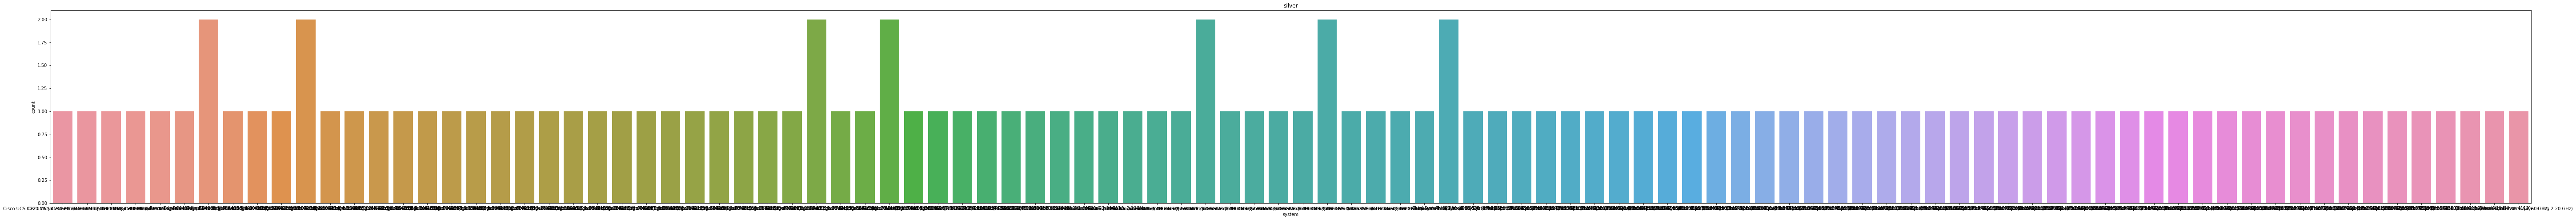

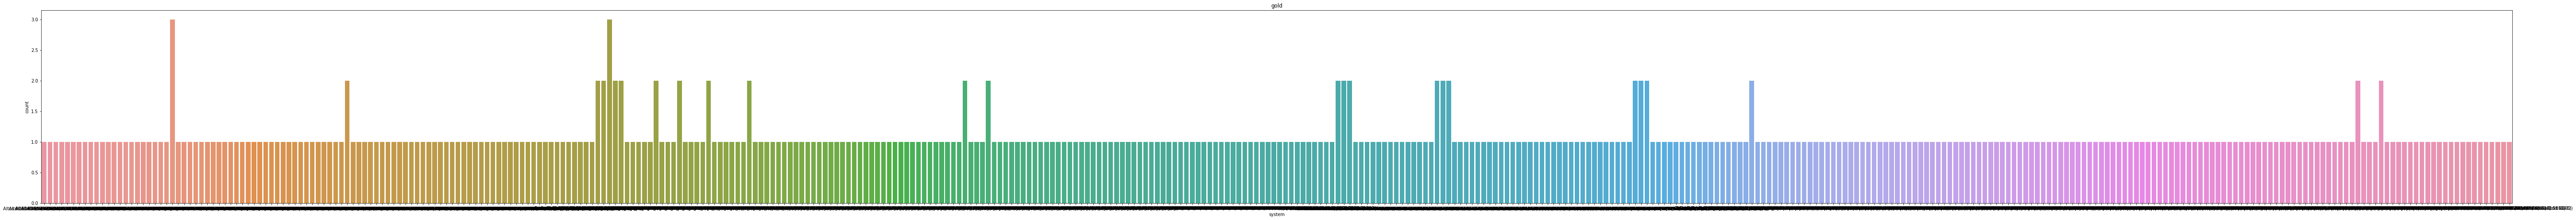

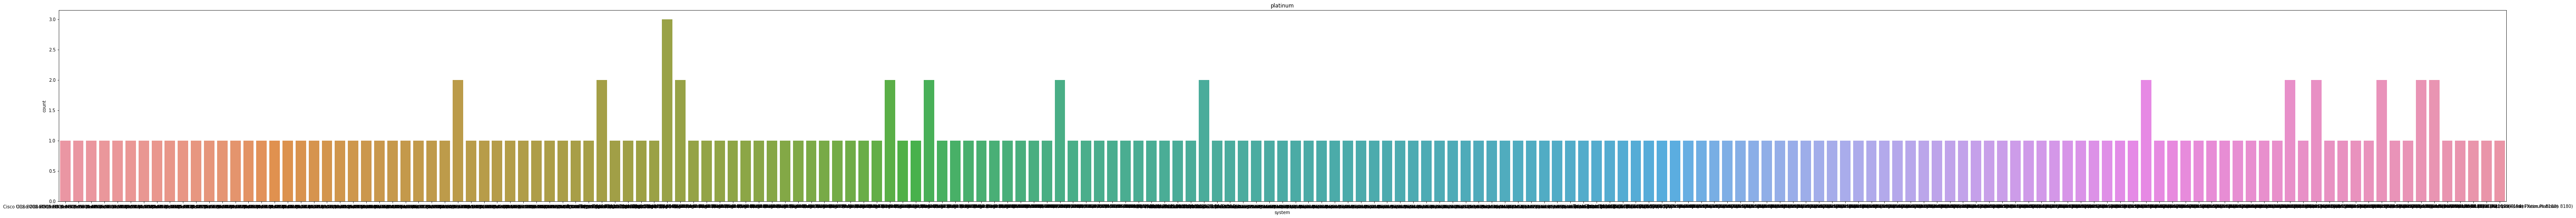

In [30]:
plt.subplots(figsize=(100,8))
sns.countplot(x='system',data=dfb)
plt.title('bronze')
plt.show()
# plt.savefig('bronze_system_count.pdf')

plt.subplots(figsize=(100,8))
sns.countplot(x='system',data=dfs)
plt.title('silver')
plt.show()
# plt.savefig('bronze_system_count.pdf')

plt.subplots(figsize=(100,8))
sns.countplot(x='system',data=dfg)
plt.title('gold')
plt.show()
# plt.savefig('bronze_system_count.pdf')

plt.subplots(figsize=(100,8))
sns.countplot(x='system',data=dfp)
plt.title('platinum')
plt.show()
# plt.savefig('bronze_system_count.pdf')


### No of cores

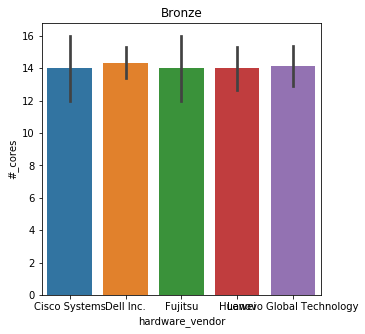

In [31]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_cores',data=dfb)
plt.title("Bronze")
plt.show()

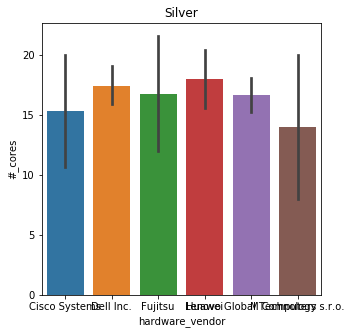

In [32]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_cores',data=dfs)
plt.title("Silver")
plt.show()

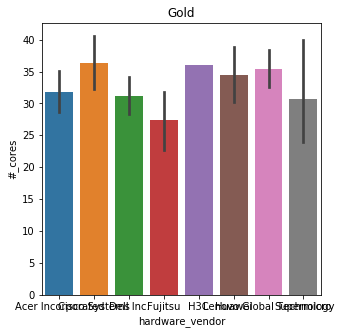

In [33]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_cores',data=dfg)
plt.title("Gold")
plt.show()

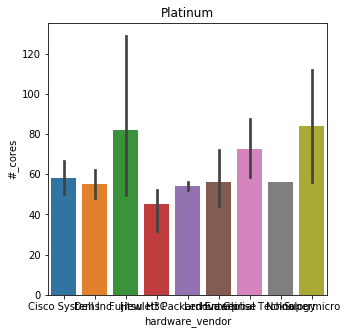

In [34]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_cores',data=dfp)
plt.title("Platinum")
plt.show()

### No of chips

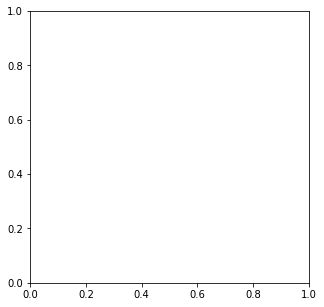

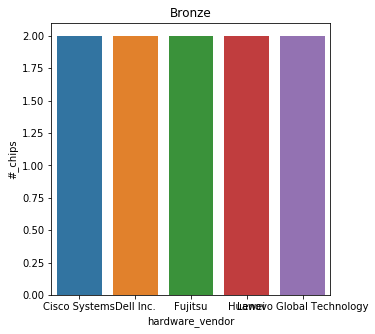

In [47]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_chips',data=dfb)
plt.title("Bronze")
plt.show()

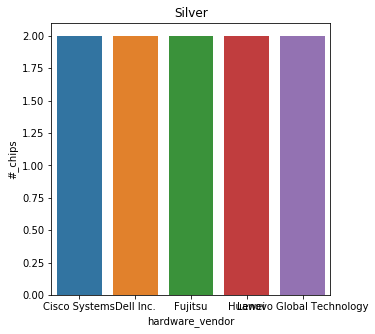

In [48]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_chips',data=dfb)
plt.title("Silver")
plt.show()

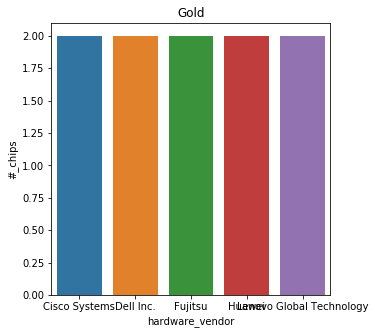

In [49]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_chips',data=dfb)
plt.title("Gold")
plt.show()

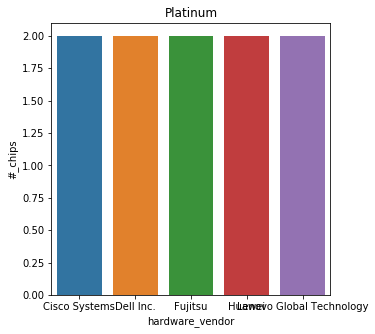

In [50]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_chips',data=dfb)
plt.title("Platinum")
plt.show()

### No of cores per chip

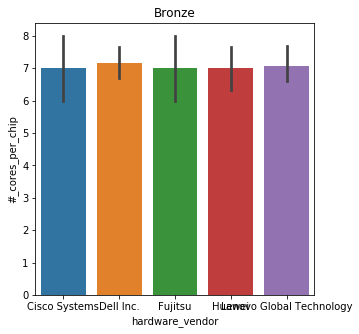

In [39]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_cores_per_chip',data=dfb)
plt.title("Bronze")
plt.show()

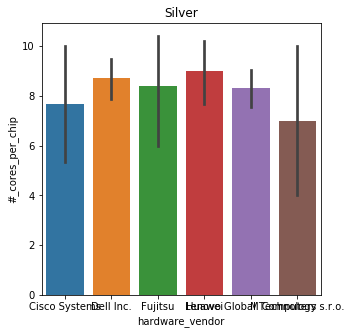

In [40]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_cores_per_chip',data=dfs)
plt.title("Silver")
plt.show()

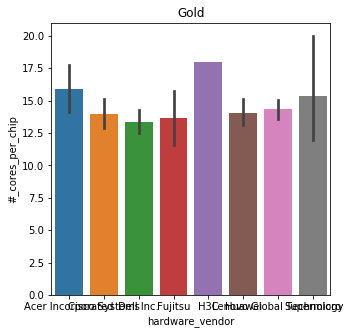

In [41]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_cores_per_chip',data=dfg)
plt.title("Gold")
plt.show()

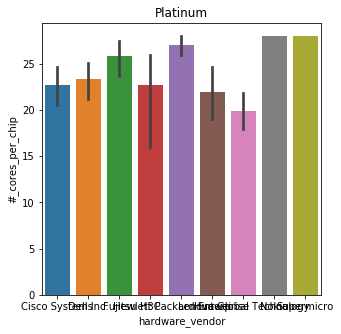

In [42]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='#_cores_per_chip',data=dfp)
plt.title("Platinum")
plt.show()

### Proceesor series use count

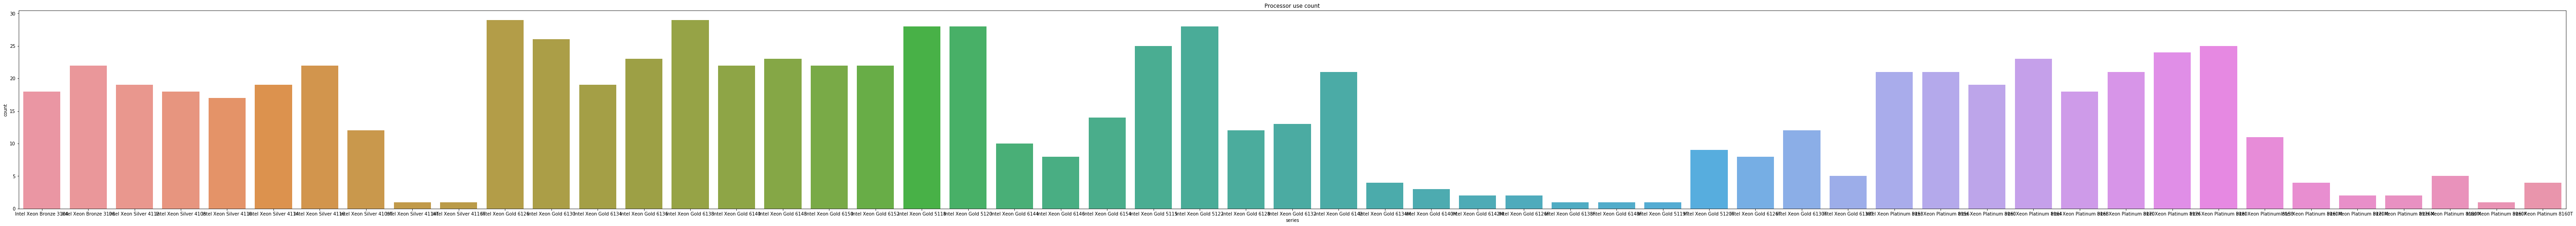

In [43]:
plt.subplots(figsize=(100,8))
sns.countplot(x='series',data=df)
plt.title('Processor use count')
plt.show()